In [90]:
library(randomForest)
library(partykit)
library(rpart)

# Méthodes de machine learning

In [2]:
data_tot = read.csv('./Donnees/Plusieurs_pays/Total.csv', header = TRUE)
data_tot = data_tot[-c(47,60)]

Création d'un nouveau dataframe sans les variables `Rating` et `Pays`, utilisé après :

In [39]:
#data = data_tot[,-c(81,82,83,84)]
data = data_tot[,-c(34:46,81,82,83,84)]

## Random Forest

Ici on cherche à faire de la prédiction sur la variable `Rating`.

In [49]:
foot.rf = randomForest(data_tot$Rating ~ ., data=data)

In [50]:
print(foot.rf)


Call:
 randomForest(formula = data_tot$Rating ~ ., data = data) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 22

          Mean of squared residuals: 0.004500818
                    % Var explained: 70


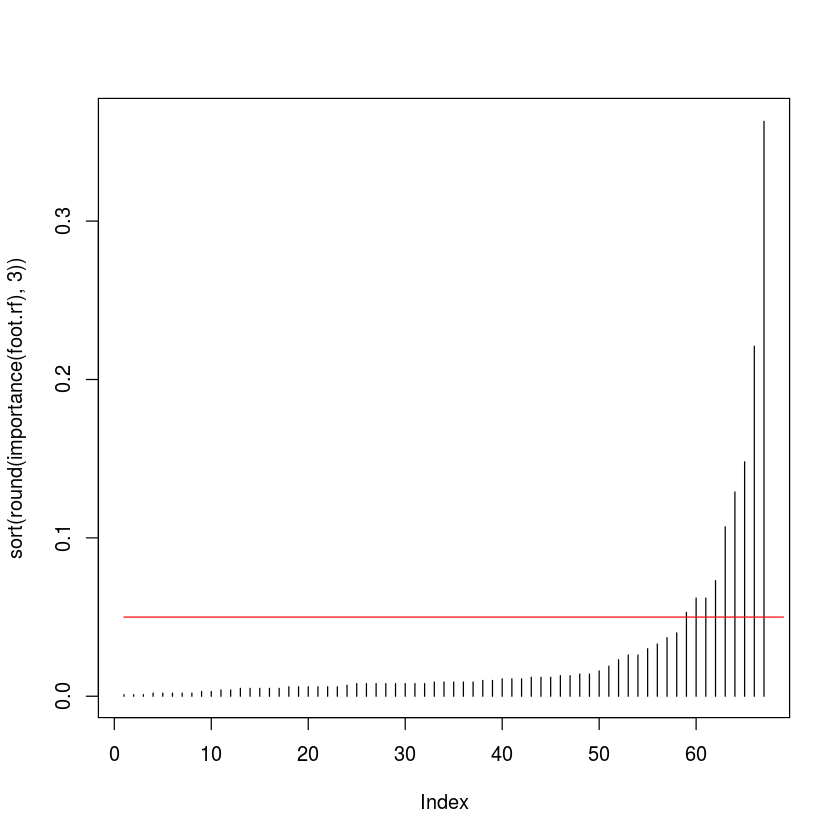

In [61]:
classement_variables = order(round(importance(foot.rf), 3))
plot(sort(round(importance(foot.rf), 3)), type = 'h')
lines(seq(1,70,2),rep(0.05,35), col = 2)

A la vue de ce graphique, on peut se fixer de ne garder que les variables pour lesquelles l'importance est supérieure à $0.05$. Il en reste alors 9.

In [67]:
df.rf = data.frame(matrix(round(importance(foot.rf)[importance(foot.rf)>0.05], 3)))
rownames(df.rf) = rownames(importance(foot.rf))[(importance(foot.rf)>0.05)]

In [68]:
df.rf

,matrix.round.importance.foot.rf..importance.foot.rf....0.05...
,<dbl>
Shots_Total,0.107
ShotsZones_PenaltyArea,0.073
ShotsAccuracy_OnTarget,0.363
Assists_Other,0.062
Assists_Total,0.148
PassesLength_Total,0.062
KeyPassesLength_Total,0.129
KeyPassesLength_Short,0.221
KeyPassesType_Other,0.053


Les variables les plus explicatives du `Rating`, d'après RandomForest, sont les variables ci-dessus.  
On remarque que `Assists_Total` et `Assists_Other` sont présentes dans cette liste. Chaque passe décisive entraîne un but donc c'est sûrement pour ça : même si on a supprimé les variables buts, on n'a pas supprimé les passes décisives qui sont directement corrélées aux buts.  
Une équipe qui fait beaucoup de passes possède beaucoup le ballon et a donc des opportunités de marquer des buts. Cela reflète aussi la construction du jeu entre les joueurs (pas ou peu de duels aériens).

#### Random Forest sur la variable Points

In [69]:
data_but = data_tot[,-c(34:46,81,82,83,84)]
data_but_tot = data_but * data_tot$Nombre

In [70]:
points.rf = randomForest(data_tot$Points ~ ., data=data_but_tot)

In [71]:
print(points.rf)


Call:
 randomForest(formula = data_tot$Points ~ ., data = data_but_tot) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 22

          Mean of squared residuals: 82.63945
                    % Var explained: 72.57


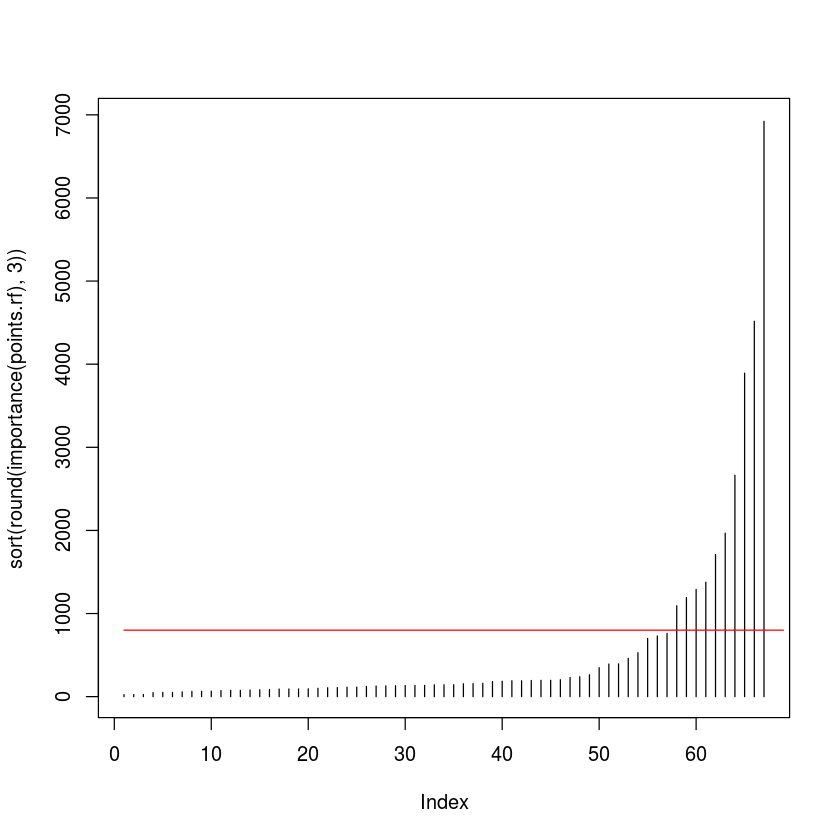

In [77]:
classement_variables_points = order(round(importance(points.rf), 3))
plot(sort(round(importance(points.rf), 3)), type = 'h')
lines(seq(1,70,2),rep(800,35), col = 2)

Ici on compte 10 variables importantes d'après RandomForest pour expliquer `Points`.

In [104]:
df.points.rf = data.frame(matrix(round(importance(points.rf)[importance(points.rf)>800], 3)))
rownames(df.points.rf) = rownames(importance(points.rf))[(importance(points.rf)>800)]

In [105]:
df.points.rf

,matrix.round.importance.points.rf..importance.points.rf....800...
,<dbl>
ShotsZones_PenaltyArea,1966.766
ShotsAccuracy_OnTarget,6921.919
Assists_Other,1710.145
Assists_Total,3892.398
PassesLength_Total,1376.556
PassesLength_AccSP,1289.637
KeyPassesLength_Total,2663.801
KeyPassesLength_Short,4516.624
KeyPassesType_Throughball,1093.589


Ici on retrouve encore une fois des passes clés, des passes décisives, et les tirs pour expliquer la variable `Points`. On retrouve aussi les passes courtes et la longueur totale des passes, qui témoignent d'une construction du jeu.

In [99]:
df.points.rf[order(df.points.rf[,1])]

ERROR: Error in `[.data.frame`(df.points.rf, order(df.points.rf[, 1])): undefined columns selected


## Extraction d'un arbre de la forêt 

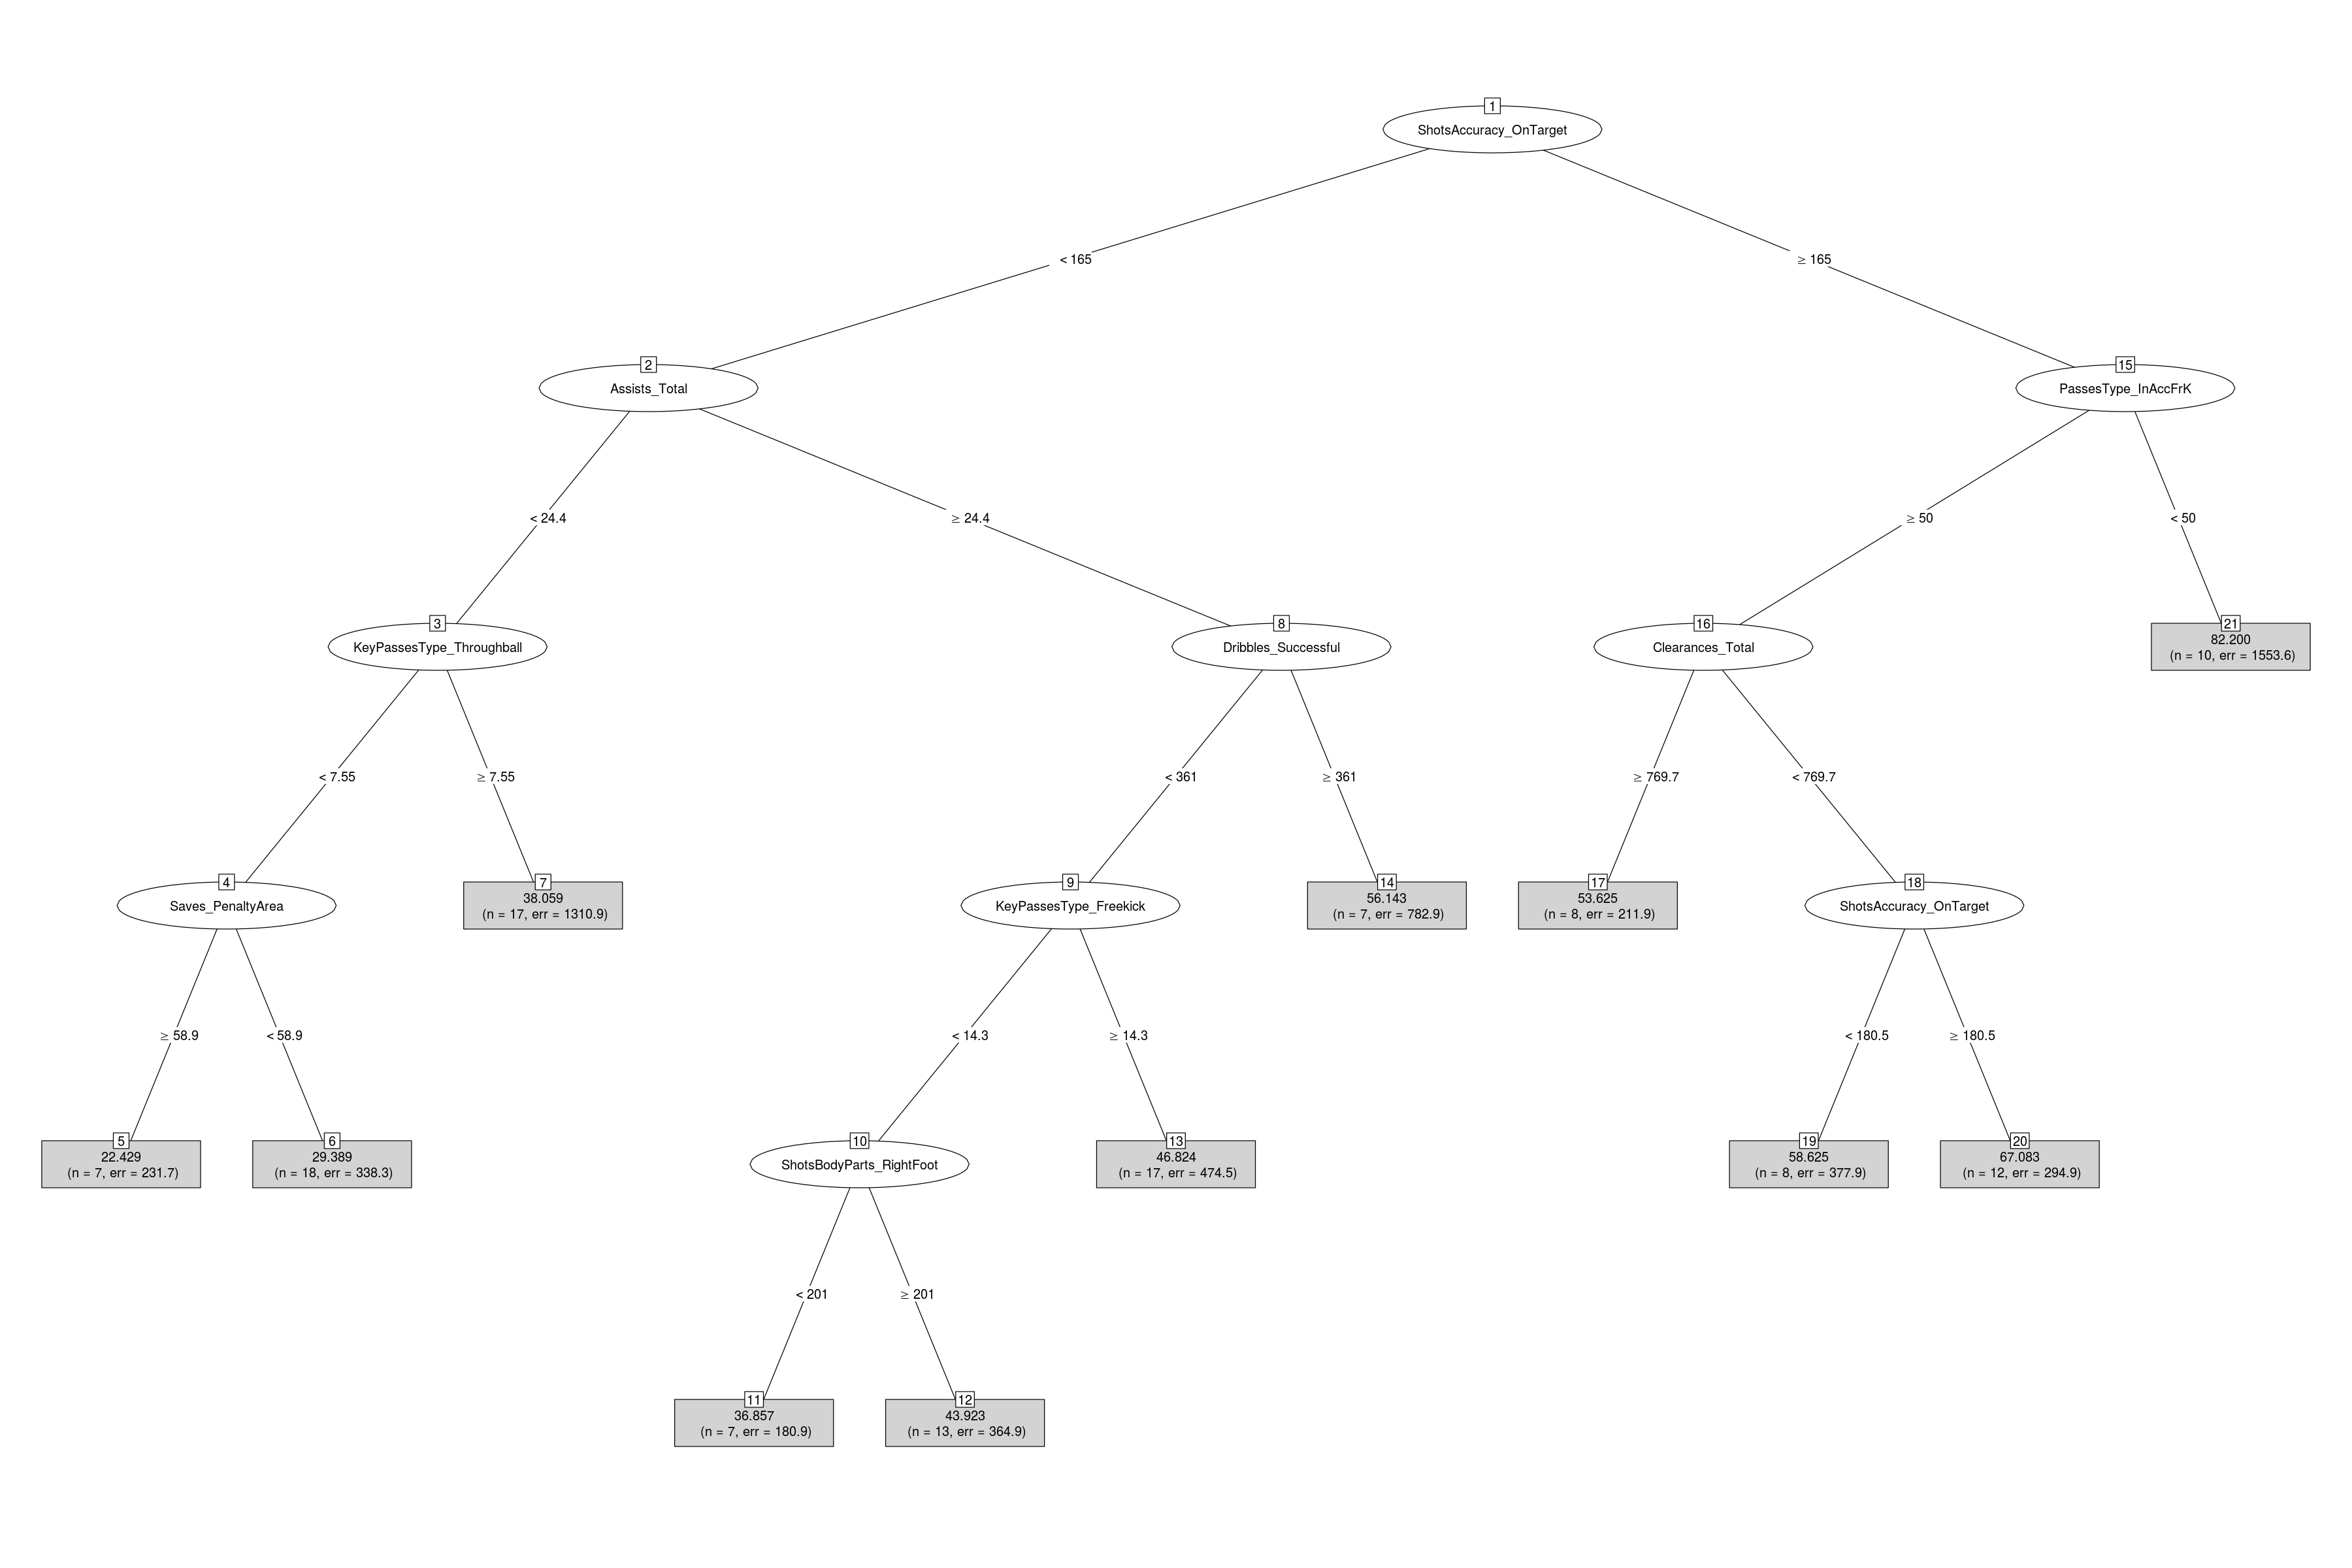

In [121]:
tree.points = rpart(data_tot$Points ~ ., data=data_but_tot, control=rpart.control(cp=0.00001))
        # le parametre cp permet de contrôler l'élagage de l'arbre

options(repr.plot.width=30, repr.plot.height=20)
plot(as.party(tree.points), type="simple")

Ici on remarque sur un arbre que la variable `ShotsAccuracy_OnTarget`, qui est la plus importante parmi les 10 retenues ci-dessus, est la première à être utilisée dans cet arbre binaire : c'est le premier noeud de l'arbre.  
Pour le paramètre `cp`, en dessous de 0.001 on ne voit plus la différence dans l'élagage de l'arbre.